# Usage Example of the HAL Project Group
## Prerequisite: 
- Importing required libraries, 
- Setting system path
- Importing HAL project

In [77]:
import os
import sys

In [78]:
sys.path.append(os.getcwd() + "/hal_pm")

In [79]:
from hal_pm import *
import datetime

## 1.) & 2.): Etablishing connection to Rest-API and requesting the data
The load_data function takes the coordinates (latitude and logitude, start and end point each) as well as a start date in `datetime` format and number of delta hours as input values. 
In first place, PM2.5 and PM10 `pandas` data frames are created seperetally. Meanwhile it creates the unique identifier column *measurement_id*, which is a combination of *sensor_id* and *time* columns in each data frame. By the unique identifier, PM2.5 and PM10 data frames are merged into a large one (since a single sensor always measures PM10 and PM2.5 values). After reordering the columns, the large data frame containing all *measurements*, *dates*, *coordinates* and *sensor_id*s is outputted to the user.

#### Place and time of measurements:
As a group, we decided to take a look at Stuttgart's fine particulate pollution in our example. This is reasoned on in the fact, that Stuttgart were famous for its ban on diesel-powered vehicles in an early stage compared to the rest of germany. Due to the fact, that one hour already contains 20134 observations, we couldn't take a longer time period into account (otherwise, loading data would take too much time). Therefore *start_date* is chosen without purpose as well. However, by only defining the datetime as *YYYY, MM, DD*, the measurements start on midnight 2018-06-01 and end on 1:00 am 2018-06-01.

In [80]:
# Load Data
start_date = datetime.datetime(2018, 6, 1)
pmdata = Load_Data.load_data(lat_start = 48.5, lat_end = 49, long_start = 9, long_end = 9.3, start_datetime = start_date, delta_hours = 1)

In [81]:
pmdata

,measurement_PM10,measurement_PM2.5,time,lat,lon,sensor_id,measurement_id
0,NaN,NaN,2018-06-01T00:00:01Z,48.798,9.070,11264,11264_2018-06-01T00:00:01Z
1,2.67,1.27,2018-06-01T00:00:01Z,48.949,9.098,122,122_2018-06-01T00:00:01Z
2,8.60,1.77,2018-06-01T00:00:01Z,48.765,9.147,4383,4383_2018-06-01T00:00:01Z
3,12.35,2.42,2018-06-01T00:00:01Z,48.779,9.034,181,181_2018-06-01T00:00:01Z
4,NaN,NaN,2018-06-01T00:00:01Z,48.779,9.034,182,182_2018-06-01T00:00:01Z
...,...,...,...,...,...,...,...
20129,3.90,1.33,2018-06-01T00:59:59Z,48.759,9.162,309,309_2018-06-01T00:59:59Z
20130,NaN,NaN,2018-06-01T00:59:59Z,48.536,9.274,202,202_2018-06-01T00:59:59Z
20131,NaN,NaN,2018-06-01T00:59:59Z,48.692,9.148,2493,2493_2018-06-01T00:59:59Z
20132,NaN,NaN,2018-06-01T00:59:59Z,48.799,9.224,5356,5356_2018-06-01T00:59:59Z


## 3.) Data Filtering

In [82]:
# Clear Data
pmdata = Filter_Data.remove_missing(pmdata)
print(pmdata)

9590 observations with missing values were removed from the data frame
       measurement_PM10  measurement_PM2.5                  time     lat  \
1                  2.67               1.27  2018-06-01T00:00:01Z  48.949   
2                  8.60               1.77  2018-06-01T00:00:01Z  48.765   
3                 12.35               2.42  2018-06-01T00:00:01Z  48.779   
5                  1.10               1.10  2018-06-01T00:00:01Z  48.791   
8                  5.12               2.78  2018-06-01T00:00:02Z  48.757   
...                 ...                ...                   ...     ...   
20119              5.10               1.15  2018-06-01T00:59:58Z  48.942   
20121              1.80               1.40  2018-06-01T00:59:58Z  48.870   
20124              3.23               1.80  2018-06-01T00:59:59Z  48.784   
20126             23.43              18.10  2018-06-01T00:59:59Z  48.516   
20129              3.90               1.33  2018-06-01T00:59:59Z  48.759   

         lon sen

## 5.) Time histories of fine particulate pollution for the sensors with the highest and lowest mean pollution levels

The `plot_average_pol` function evaluates the *sensor_id*s with the lowest and highest average measurement per PM10/PM2.5 seperatelly. In a second steps, it takes the measurements of these sensors and plots them against a timeline. The plot is organized in subplots as following:
- **Rows**: PM10 or PM2.5 measurement
- **Columns**: sensors with average maximum (Red) or average minumum (Blue)

NameError: name 'fig1' is not defined

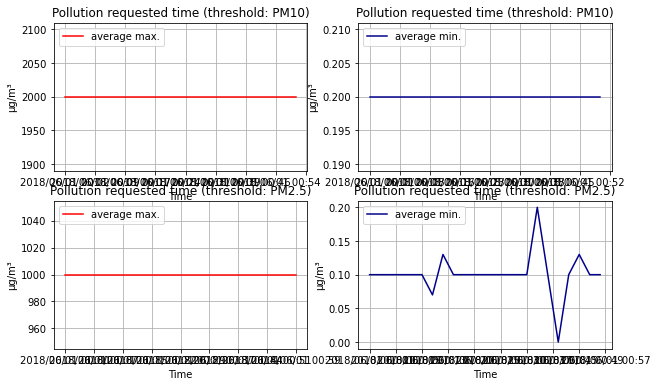

In [86]:
# Plot average polution
Time_Plots.plot_average_pol(pmdata)